In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [7]:
data = pd.read_csv("../data/train.csv")

In [8]:
data.head(3)

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0


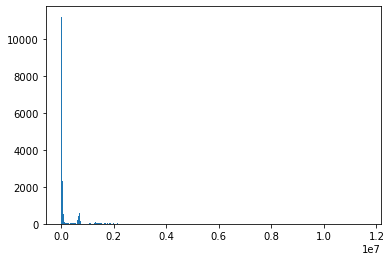

In [148]:
plt.hist(data.Sum_of_Luminosity, bins=500);

In [9]:
data.columns

Index(['id', 'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'],
      dtype='object')

In [13]:
count_faults = data[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']].sum()

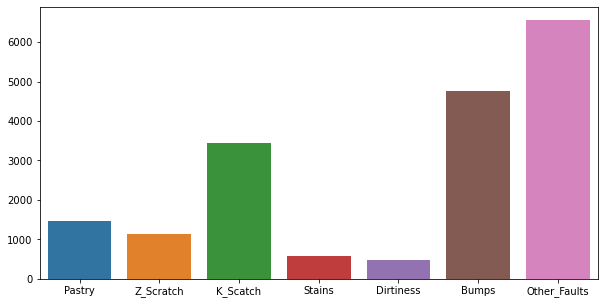

In [19]:
plt.figure(figsize=(10,5))
sns.barplot(x=count_faults.index, y=count_faults);

In [58]:
# Create the new column with zeros
data['Class_Numeric'] = 0

# Map class labels to numerical values
class_columns = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
for class_col in class_columns:
    data.loc[data[class_col] == 1, 'Class_Numeric'] = class_columns.index(class_col)

In [60]:
data.Class_Numeric.value_counts()

6    6558
5    4763
2    3412
0    2283
1    1150
3     568
4     485
Name: Class_Numeric, dtype: int64

In [61]:
X = data[['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas']]
y = data[['Class_Numeric']]

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=37)

In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score

In [65]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [66]:
clf.classes_

array([0, 1, 2, 3, 4, 5, 6])

In [67]:
prediction = clf.predict_proba(X_val)

In [72]:
prediction_tmp = clf.predict(X_val)
accuracy_score(y_val, prediction_tmp)

0.5671175858480749

In [73]:
test_data = pd.read_csv("../data/test.csv")

In [75]:
id_test = test_data.id
test_data.drop(columns=['id'], inplace=True)
prediction_test = clf.predict_proba(test_data)

In [77]:
submission_random_forest = pd.read_csv("../data/sample_submission.csv")
submission_random_forest = submission_random_forest[0:0]
submission_random_forest.id = id_test
submission_random_forest[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults']] = prediction_test

In [79]:
submission_random_forest.to_csv("../data/submission_random_forest.csv", index=False)

In [95]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [96]:
min_max_scaler = StandardScaler()
min_max_scaler.fit(X)
X_normalised = min_max_scaler.transform(X)

In [97]:
X_normalised_train, X_normalised_test, y_normalised_train, y_normalised_test = train_test_split(X_normalised, y, test_size=0.3, random_state=37)

In [98]:
clf_normalised = RandomForestClassifier()
clf_normalised.fit(X_normalised_train, y_normalised_train)

RandomForestClassifier()

In [99]:
prediction_normalised = clf.predict(X_normalised_test)
prediction_normalised_prob = clf.predict_proba(X_normalised_test)

In [111]:
accuracy_score(y_normalised_test, prediction_normalised)

0.2738466874783212

### This is not working fine

## Now, we will look at choosing equal proportion of data

In [133]:
n_min_samples = data.Class_Numeric.value_counts().min()

In [134]:
samples = []
for class_label in data.Class_Numeric.unique():
    mples.append((data[data.Class_Numeric == class_label]).sample(1150))

In [135]:
data_sampled = pd.concat(samples)

In [136]:
X = data_sampled[['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas']]
y = data_sampled[['Class_Numeric']]

In [137]:
from sklearn.model_selection import train_test_split

In [138]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=37)

In [139]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score

In [140]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [141]:
clf.classes_

array([0, 1, 2, 3, 4, 5, 6])

In [142]:
prediction = clf.predict_proba(X_val)

In [143]:
prediction_tmp = clf.predict(X_val)
accuracy_score(y_val, prediction_tmp)

0.5903968642822146

In [129]:
test_data = pd.read_csv("../data/test.csv")

In [130]:
id_test = test_data.id
test_data.drop(columns=['id'], inplace=True)
prediction_test = clf.predict_proba(test_data)

In [131]:
submission_random_forest = pd.read_csv("../data/sample_submission.csv")
submission_random_forest = submission_random_forest[0:0]
submission_random_forest.id = id_test
submission_random_forest[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults']] = prediction_test

In [132]:
submission_random_forest.to_csv("../data/submission_random_forest_balanced_data.csv", index=False)